# Predictive Modeling of Worldwide Emotional Trends

Analyzing the past emotions that were searched all over the world by using the collected data, created a model to predict the emotions literally.

# Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv("manam.csv")
df.head()

,date,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,2018-08-26,0,2,5,55,64,57,35,0,20,...,19,22,0,0,29,27,19,60,19,11
1,2018-09-02,0,0,0,50,80,72,37,18,21,...,31,22,0,3,37,23,7,65,19,13
2,2018-09-09,1,0,9,52,73,70,39,20,20,...,15,22,0,4,33,0,19,68,19,13
3,2018-09-16,0,0,9,42,82,57,36,0,81,...,12,23,0,7,33,23,21,62,18,12
4,2018-09-23,0,0,0,43,68,67,37,0,31,...,35,22,0,7,33,22,7,67,18,13


# Data processing

In [3]:
df.shape

(260, 24)

Observation:
    
    --> It consists of 260 rows and 24 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          260 non-null    object
 1   happy         260 non-null    int64 
 2   sad           260 non-null    int64 
 3   neutral       260 non-null    int64 
 4   anxious       260 non-null    int64 
 5   stressed      260 non-null    int64 
 6   excited       260 non-null    int64 
 7   lonely        260 non-null    int64 
 8   confident     260 non-null    int64 
 9   grateful      260 non-null    int64 
 10  motivated     260 non-null    int64 
 11  angry         260 non-null    int64 
 12  overwhelmed   260 non-null    int64 
 13  inspired      260 non-null    int64 
 14  relieved      260 non-null    int64 
 15  bored         260 non-null    int64 
 16  hopeful       260 non-null    int64 
 17  fearful       260 non-null    int64 
 18  disappointed  260 non-null    int64 
 19  calm    

In [5]:
df.describe()

,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,motivated,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,0.434615,1.703846,2.857692,66.415385,70.953846,69.500000,37.269231,19.284615,28.123077,59.938462,...,40.130769,28.773077,8.888462,5.596154,34.646154,35.500000,35.430769,73.907692,24.703846,16.326923
std,0.504376,1.449532,5.065492,13.250648,9.106713,9.625617,7.719792,20.017650,18.905379,10.377994,...,18.670435,11.627688,15.404428,4.523041,5.591446,14.768614,17.982376,7.735937,14.257992,6.488841
min,0.000000,0.000000,0.000000,34.000000,44.000000,47.000000,28.000000,0.000000,0.000000,35.000000,...,0.000000,16.000000,0.000000,0.000000,27.000000,0.000000,0.000000,49.000000,15.000000,8.000000
25%,0.000000,0.000000,0.000000,57.000000,65.000000,62.000000,34.000000,0.000000,15.000000,53.000000,...,26.000000,22.000000,0.000000,0.000000,32.000000,26.000000,23.000000,68.000000,18.000000,13.000000
50%,0.000000,2.000000,0.000000,64.500000,72.000000,69.500000,36.000000,17.000000,27.000000,59.000000,...,38.000000,25.000000,0.000000,5.000000,34.000000,34.000000,31.000000,74.000000,20.000000,15.000000
75%,1.000000,3.000000,6.000000,76.000000,77.000000,76.000000,38.000000,30.250000,39.000000,66.000000,...,53.000000,31.000000,16.000000,8.000000,36.000000,44.000000,45.000000,79.250000,24.000000,19.000000
max,2.000000,8.000000,25.000000,100.000000,100.000000,100.000000,100.000000,97.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,21.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
df.isnull().sum()

date            0
happy           0
sad             0
neutral         0
anxious         0
stressed        0
excited         0
lonely          0
confident       0
grateful        0
motivated       0
angry           0
overwhelmed     0
inspired        0
relieved        0
bored           0
hopeful         0
fearful         0
disappointed    0
calm            0
energetic       0
fulfilled       0
proud           0
vulnerable      0
dtype: int64

In [7]:
df.columns

Index(['date', 'happy', 'sad', 'neutral', 'anxious', 'stressed', 'excited',
       'lonely', 'confident', 'grateful', 'motivated', 'angry', 'overwhelmed',
       'inspired', 'relieved', 'bored', 'hopeful', 'fearful', 'disappointed',
       'calm', 'energetic', 'fulfilled', 'proud', 'vulnerable'],
      dtype='object')

In [8]:
df.isna().sum()

date            0
happy           0
sad             0
neutral         0
anxious         0
stressed        0
excited         0
lonely          0
confident       0
grateful        0
motivated       0
angry           0
overwhelmed     0
inspired        0
relieved        0
bored           0
hopeful         0
fearful         0
disappointed    0
calm            0
energetic       0
fulfilled       0
proud           0
vulnerable      0
dtype: int64

# Data Visualization

# Visualizion using barplot

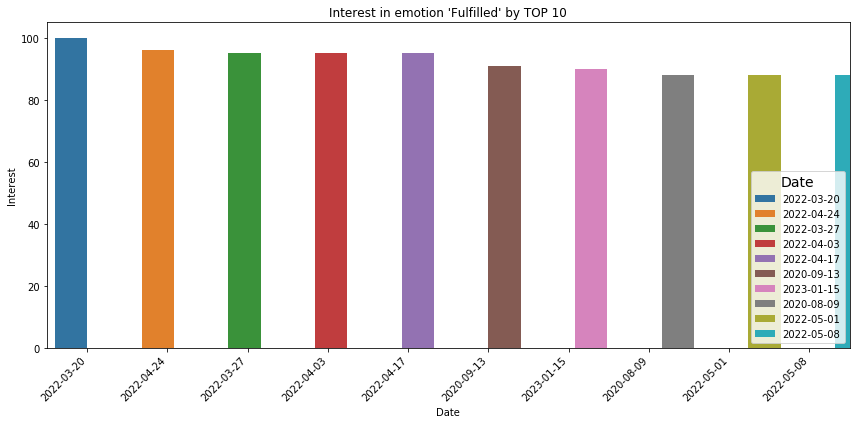

In [9]:
plt.figure(figsize=(12, 6))

subset_countries = df.nlargest(10, "fulfilled")

ax = sns.barplot(data=subset_countries, x='date', y='fulfilled',hue = 'date')

ax.legend(title="Date", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Fulfilled' by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 

plt.show()

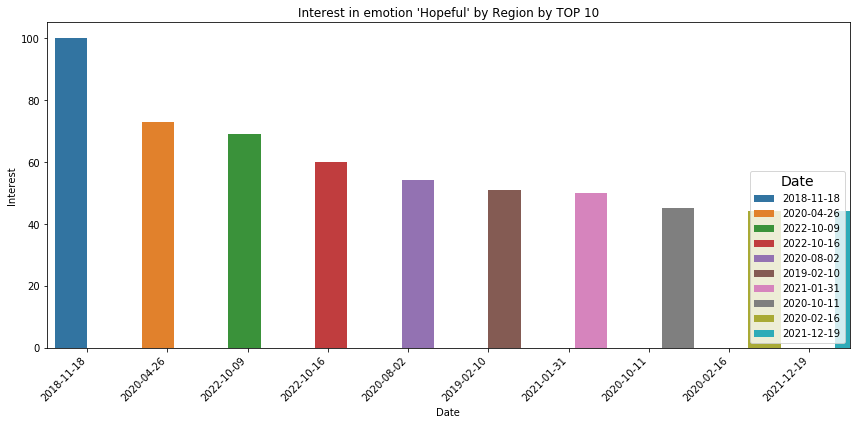

In [10]:
plt.figure(figsize=(12, 6))

subset_countries = df.nlargest(10, "hopeful")

ax = sns.barplot(data=subset_countries, x='date', y='hopeful',hue = 'date')

ax.legend(title="Date", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Hopeful' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

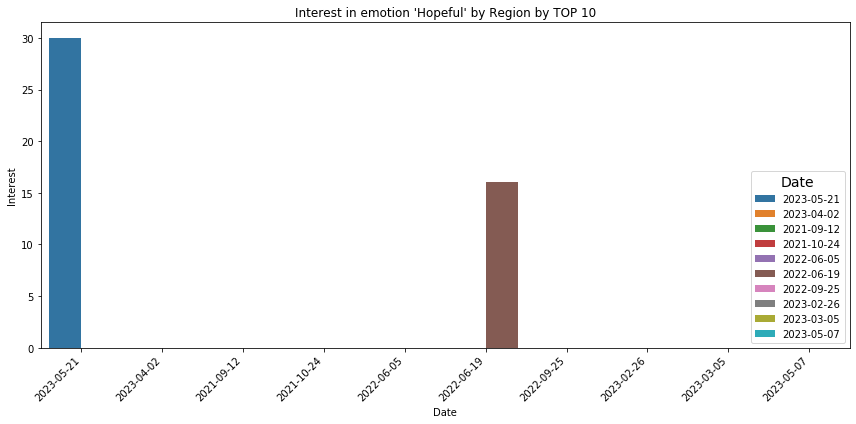

In [11]:
plt.figure(figsize=(12, 6))

subset_countries = df.nlargest(10, "sad")

ax = sns.barplot(data=subset_countries, x='date', y='hopeful',hue = 'date')

ax.legend(title="Date", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Hopeful' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

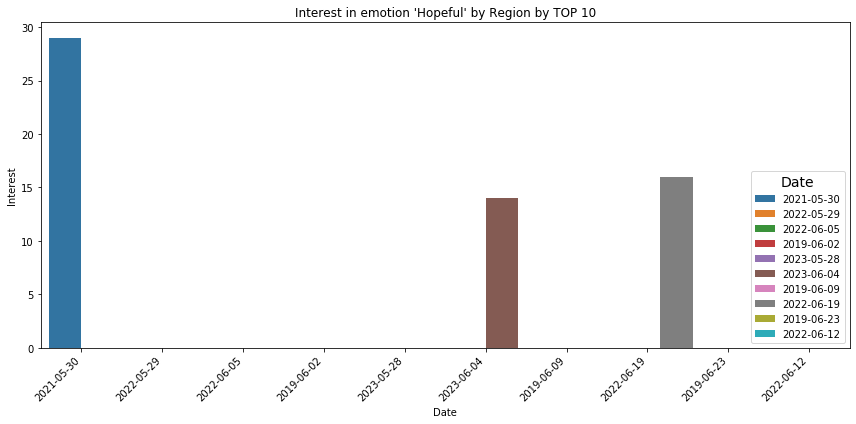

In [12]:
plt.figure(figsize=(12, 6))

subset_countries = df.nlargest(10, "proud")

ax = sns.barplot(data=subset_countries, x='date', y='hopeful',hue = 'date')

ax.legend(title="Date", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Hopeful' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

# Data Preparation

In [14]:
emotion_columns = ['happy', 'sad', 'neutral', 'anxious', 'stressed', 'excited',
       'lonely', 'confident', 'grateful', 'motivated', 'angry', 'overwhelmed',
       'inspired', 'relieved', 'bored', 'hopeful', 'fearful', 'disappointed',
       'calm', 'energetic', 'fulfilled', 'proud', 'vulnerable']

In [16]:
X = df[emotion_columns].values

In [22]:
n_steps =10 #previous time steps

# Perform Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
X_scaled = ms.fit_transform(X)

In [25]:
X_scaled

array([[0.        , 0.25      , 0.2       , ..., 0.21568627, 0.04705882,
        0.0326087 ],
       [0.        , 0.        , 0.        , ..., 0.31372549, 0.04705882,
        0.05434783],
       [0.5       , 0.        , 0.36      , ..., 0.37254902, 0.04705882,
        0.05434783],
       ...,
       [0.        , 0.        , 0.24      , ..., 0.60784314, 0.18823529,
        0.11956522],
       [0.5       , 0.25      , 0.        , ..., 0.49019608, 0.12941176,
        0.11956522],
       [0.5       , 0.        , 0.24      , ..., 0.58823529, 0.11764706,
        0.10869565]])

In [26]:
X_scaled.shape

(260, 23)

In [28]:
X_1 = []
y_1 = []

for i in range(n_steps, len(X_scaled)):
    X_1.append(X_scaled[i-n_steps:i].flatten())
    y_1.append(np.argmax(X_scaled[i]))

In [29]:
X_1 = np.array(X_1)
y_1 = np.array(y_1)

# Divide the data into X_1 and y_1

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, shuffle = False)

# Perform K-Nearest Neighbor on train data

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Perform prediction on test data

In [35]:
y_pred = knn.predict(X_test)
y_pred

array([10,  0,  3,  0, 20, 20,  3, 20, 20, 20,  3, 20, 20, 20,  3, 20, 20,
       11,  2,  0,  0,  3,  2, 20, 20, 20, 20, 20,  3, 20,  3,  3, 21, 20,
        3,  3,  3, 20, 21, 21, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=int64)

# Perform Support Vector Machine on train data

In [36]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Perform prediction on test data

In [38]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([ 3,  3, 11,  3,  3, 11,  3,  3,  3, 10, 11,  3, 20, 10, 10,  3, 20,
        3,  3, 13,  3,  3, 10,  3, 11,  3, 11, 11,  3,  3, 11, 11, 11,  3,
        3,  3, 11, 11,  3, 21, 10,  3,  3,  3,  3, 10,  3,  3, 11, 10],
      dtype=int64)

# Evaluation metrics

In [41]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"k-NN Accuracy: {knn_accuracy:.4f}")

k-NN Accuracy: 0.1800


In [42]:
knn_svc = accuracy_score(y_test, y_pred)
print(f"k-NN SVC: {knn_svc:.4f}")

k-NN SVC: 0.1800


# Observations

--> Both the k-Nearest Neighbors (k-NN) and Support Vector Classifier (SVC) models exhibited an accuracy of 18% on the test data. 

--> This accuracy level is significantly below the desired performance.

--> The current 18% accuracy of the models necessitates substantial improvement.

--> The feature representation of past emotion scores might not effectively capture underlying patterns.

--> Hyperparameters for both models may need tuning.

--> Data preprocessing should be reviewed for accuracy and proper scaling.
